# Recoinize

[https://github.com/nicknochnack/FaceRecognition](https://github.com/nicknochnack/FaceRecognition/blob/main/Facial%20Verification%20with%20a%20Siamese%20Network%20-%20Final.ipynb)

## Settings

These are the settings for the notebook. You can change them to fit your needs.

- `KERNEL_LOCATION`: (`'local'` or `'paperspace'`) This setting is here to load the right libraries. Paperspace devices have a different setup than local machines.
- `LOG_LEVEL`: (`'DEBUG'`, `'INFO'`, `'WARNING'`, `'ERROR'`, `'CRITICAL'`) This setting is here to set the log level for the notebook.
- `DATASET_SOURCE`: (`'local'` or `'huggingface'`) This setting is here to load the dataset from the local machine or from the HuggingFace repos.
- `DATASET_NAME`: (`str`) This setting is here to set the URL of the HuggingFace repos.

In [6]:
KERNEL_LOCATION = "local"
LOG_LEVEL = "info"                       # TODO: handle log level
DATASET_SOURCE = "huggingface"
DATASET_NAME = "photonsquid/coins-euro"

Set auto-reload for the notebook, so all modifications in other python files will be loaded automatically in this Notebook.

In [2]:
%load_ext autoreload
%autoreload 2

If you want, you can check what is your GPU.

In [ ]:
from src.helpers.cmd import print_gpu_name
print_gpu_name()

## Install dependencies

This command will install all the dependencies that are in the `requirements.txt` file.

In [3]:
from src.helpers.install import install_requirements
# install_requirements()

## Pull code from GitHub

If you're using Paperspace, you have to pull the code from GitHub each time there is a comit.
If you're using a local machine, this step is skipped.

In [2]:
if KERNEL_LOCATION == "paperspace":
    from src.helpers.cmd import git_update
    git_update("live-edit", force=False, show_output=False)

## Import dependencies

In [ ]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf

from src.dataset import create_pairs

## Get data

In [ ]:
match DATASET_SOURCE:
    case "huggingface":
        from datasets.load import load_dataset as HF_load_dataset
        dataset = HF_load_dataset('photonsquid/coins-euro')
        # convert the dataset to tensorflow dataset
        # dataset = dataset.with_format('tf')
    case "local":
        # load data from local files
        from src.helpers.load_data import load_data as local_load_data
        dataset = local_load_data("data/tests")
    case _:
        print("Invalid dataset source")

## Prepare data

In [41]:
train_dataset = dataset["train"]

In [44]:
anchor_imgs, validation_imgs, labels = create_pairs(train_dataset)

In [46]:
# convert anchor_imgs and validation_imgs to tensors
anchor_imgs = tf.convert_to_tensor(anchor_imgs)
validation_imgs = tf.convert_to_tensor(validation_imgs)
labels = tf.convert_to_tensor(labels)

In [48]:
# create a tensorflow dataset
data = tf.data.Dataset.from_tensor_slices((anchor_imgs, validation_imgs, labels))

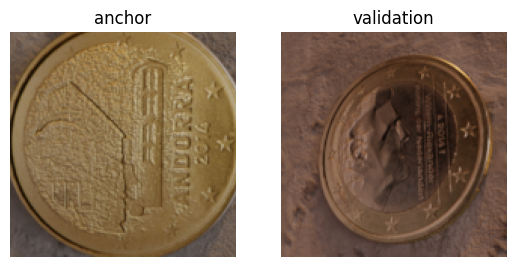

In [54]:
for image in data:
    anchor = image[0].numpy()
    validation = image[1].numpy()
    label = "positive" if sum(image[2].numpy()) == 5 else "negative"

    # show the images
    plt.subplot(1, 2, 1)
    plt.imshow(anchor)
    plt.axis('off')
    plt.title("anchor")
    plt.subplot(1, 2, 2)
    plt.imshow(validation)
    plt.axis('off')
    plt.title(label)
    plt.show()

    break